In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df=pd.read_csv(r"C:\Users\Admin\Documents\7th sem\ds\datasets\P3_Weather.csv")

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
df.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [4]:
df.count()

STA            119040
Date           119040
Precip         119040
WindGustSpd       532
MaxTemp        119040
MinTemp        119040
MeanTemp       119040
Snowfall       117877
PoorWeather     34237
YR             119040
MO             119040
DA             119040
PRCP           117108
DR                533
SPD               532
MAX            118566
MIN            118572
MEA            118542
SNF            117877
SND              5563
FT                  0
FB                  0
FTI                 0
ITH                 0
PGT               525
TSHDSBRSGF      34237
SD3                 0
RHX                 0
RHN                 0
RVG                 0
WTE                 0
dtype: int64

In [19]:
df=df.drop(columns=['PoorWeather'])
df=df.drop(columns=['WindGustSpd','DR','SPD','SND','FT','FB','FTI','ITH','PGT','SD3','RHX','RHN','RVG','WTE'])

In [52]:
df['MaxTemp']=pd.to_numeric(df['MaxTemp'],errors='coerce')
df['MeanTemp']=pd.to_numeric(df['MeanTemp'],errors='coerce')
df['Snowfall']=pd.to_numeric(df['Snowfall'],errors='coerce')
df['MinTemp']=pd.to_numeric(df['MinTemp'],errors='coerce')
df['Precip']=pd.to_numeric(df['Precip'],errors='coerce')
df.dropna(how='any', subset=['Precip'])
df.dropna(how='any', subset=['MinTemp','MeanTemp','Snowfall'])

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF,TSHDSBRSGF
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,0.0,42,7,1,0.04,78.0,72.0,75.0,0,NaN
1,10001,1942-7-2,0.000,28.888889,21.666667,25.555556,0.0,42,7,2,0,84.0,71.0,78.0,0,NaN
2,10001,1942-7-3,2.540,26.111111,22.222222,24.444444,0.0,42,7,3,0.1,79.0,72.0,76.0,0,NaN
3,10001,1942-7-4,2.540,26.666667,22.222222,24.444444,0.0,42,7,4,0.1,80.0,72.0,76.0,0,NaN
4,10001,1942-7-5,0.000,26.666667,21.666667,24.444444,0.0,42,7,5,0,80.0,71.0,76.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0.000,28.333333,18.333333,23.333333,0.0,45,12,27,0,83.0,65.0,74.0,0,NaN
119036,82506,1945-12-28,9.906,29.444444,18.333333,23.888889,0.0,45,12,28,0.39,85.0,65.0,75.0,0,1
119037,82506,1945-12-29,0.000,28.333333,18.333333,23.333333,0.0,45,12,29,0,83.0,65.0,74.0,0,1
119038,82506,1945-12-30,0.000,28.333333,18.333333,23.333333,0.0,45,12,30,0,83.0,65.0,74.0,0,NaN


In [53]:
import seaborn as sns
corr=df.corr() #Compute pairwise correlation of columns, excluding NA/null values.
print(corr)


               STA    Precip   MaxTemp   MinTemp  MeanTemp  Snowfall  \
STA       1.000000  0.013238  0.092371  0.059319  0.078112 -0.058382   
Precip    0.013238  1.000000 -0.003083  0.098579  0.048346 -0.010480   
MaxTemp   0.092371 -0.003083  1.000000  0.878384  0.969048 -0.336999   
MinTemp   0.059319  0.098579  0.878384  1.000000  0.965425 -0.320022   
MeanTemp  0.078112  0.048346  0.969048  0.965425  1.000000 -0.338234   
Snowfall -0.058382 -0.010480 -0.336999 -0.320022 -0.338234  1.000000   
YR        0.121408  0.004260  0.039585 -0.020733  0.010681 -0.000890   
MO       -0.008592  0.041121  0.031346  0.069078  0.050769 -0.045052   
DA        0.000903  0.000810 -0.005130 -0.002576 -0.004153 -0.000271   
MAX       0.083943 -0.004075  1.000000  0.872096  0.965838 -0.357927   
MIN       0.050807  0.102444  0.870594  1.000000  0.963279 -0.333037   
MEA       0.069775  0.050442  0.968247  0.966441  1.000000 -0.357768   

                YR        MO        DA       MAX       MIN     

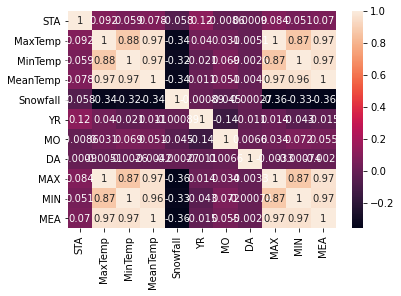

In [27]:
sns.heatmap(corr, annot=True)
plt.show()


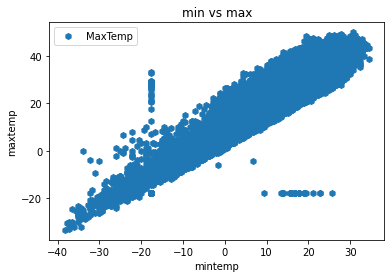

In [28]:
df.plot(x='MinTemp', y='MaxTemp' , style='h')
plt.title('min vs max')
plt.xlabel('mintemp')
plt.ylabel('maxtemp')
plt.show()

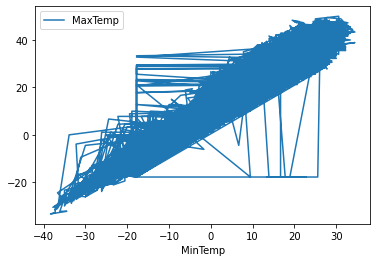

In [30]:
lines = df.plot(x='MinTemp', y='MaxTemp')



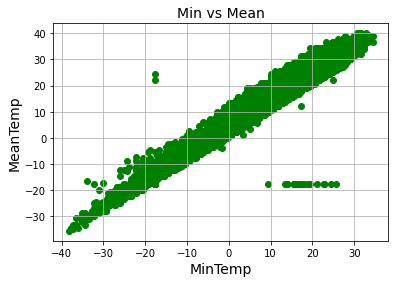

In [33]:
plt.scatter(df['MinTemp'], df['MeanTemp'], color='green')
plt.title('Min vs Mean', fontsize=14)
plt.xlabel('MinTemp', fontsize=14)
plt.ylabel('MeanTemp', fontsize=14)
plt.grid(True)
plt.show()

In [34]:
X=df['MinTemp'].values.reshape(-1,1)
y=df['MaxTemp'].values.reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [35]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [36]:
print('Intercept is :',model.intercept_)

Intercept is : [10.66185201]


In [37]:
print('Coefficient is :' ,model.coef_)

Coefficient is : [[0.92033997]]


In [38]:
y_pred= model.predict(X_test)

In [39]:
df1=  pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df1)

          Actual  Predicted
0      28.888889  33.670351
1      31.111111  30.091251
2      27.222222  26.512151
3      28.888889  31.113851
4      23.333333  15.774852
...          ...        ...
23803  32.777778  32.136451
23804  32.222222  29.068651
23805  31.111111  32.647751
23806  31.111111  30.602551
23807  36.666667  31.625151

[23808 rows x 2 columns]


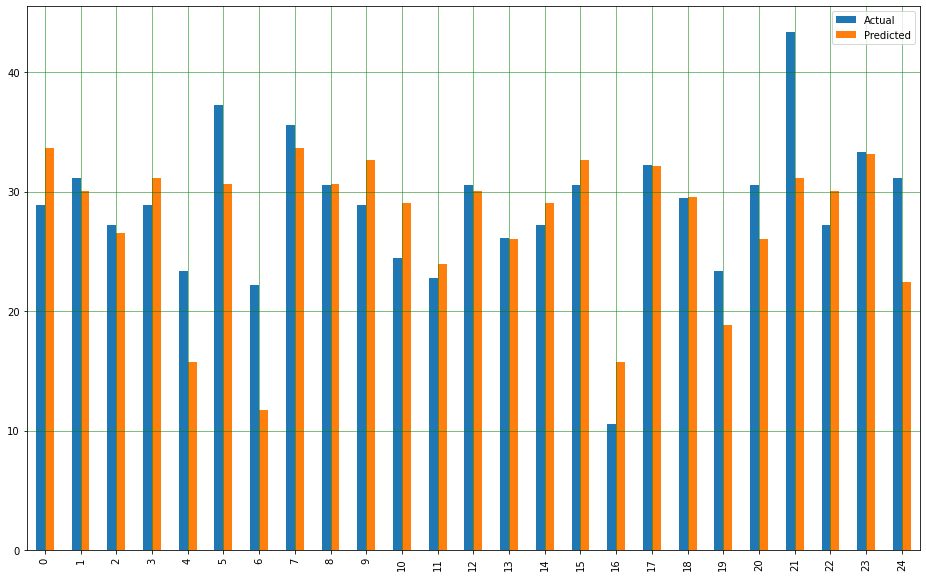

In [40]:
df2= df1.head(25)
df2.plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-',linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':',linewidth='0.5', color='black')
plt.show()

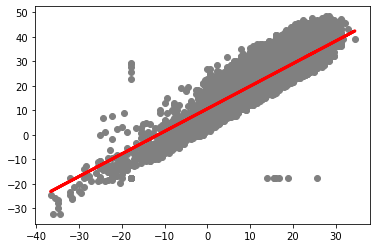

In [41]:
plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,y_pred,color='red',linewidth=3)
plt.show()

In [110]:
print('Mean abolute error is:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared error is:', metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error is:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean abolute error is: 3.1993291783785285
Mean squared error is: 17.631568097568444
Root mean squared error is: 4.198996082109204


In [45]:
new_min=3.4
print ('Predicted Max Temp: \n', model.predict([[new_min]]))

Predicted Max Temp: 
 [[13.79100789]]


In [48]:
#multiple Linear regression
'''x1=Meantemp
x2=Mintemp
x3=PRecipitaion
y=snowfall'''

'x1=Meantemp\nx2=Mintemp\nx3=Snowfall\ny=Precipitation'

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF,TSHDSBRSGF
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,0.0,42,7,1,0.04,78.0,72.0,75.0,0,NaN
1,10001,1942-7-2,0.000,28.888889,21.666667,25.555556,0.0,42,7,2,0,84.0,71.0,78.0,0,NaN
2,10001,1942-7-3,2.540,26.111111,22.222222,24.444444,0.0,42,7,3,0.1,79.0,72.0,76.0,0,NaN
3,10001,1942-7-4,2.540,26.666667,22.222222,24.444444,0.0,42,7,4,0.1,80.0,72.0,76.0,0,NaN
4,10001,1942-7-5,0.000,26.666667,21.666667,24.444444,0.0,42,7,5,0,80.0,71.0,76.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0.000,28.333333,18.333333,23.333333,0.0,45,12,27,0,83.0,65.0,74.0,0,NaN
119036,82506,1945-12-28,9.906,29.444444,18.333333,23.888889,0.0,45,12,28,0.39,85.0,65.0,75.0,0,1
119037,82506,1945-12-29,0.000,28.333333,18.333333,23.333333,0.0,45,12,29,0,83.0,65.0,74.0,0,1
119038,82506,1945-12-30,0.000,28.333333,18.333333,23.333333,0.0,45,12,30,0,83.0,65.0,74.0,0,NaN


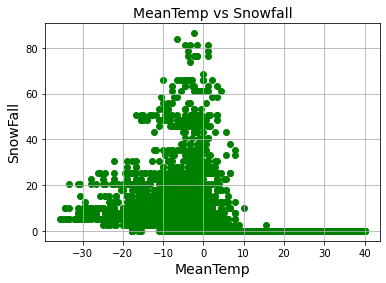

In [50]:
plt.scatter(df['MeanTemp'], df['Snowfall'], color='green')
plt.title('MeanTemp vs Snowfall', fontsize=14)
plt.xlabel('MeanTemp', fontsize=14)
plt.ylabel('SnowFall', fontsize=14)
plt.grid(True)
plt.show()

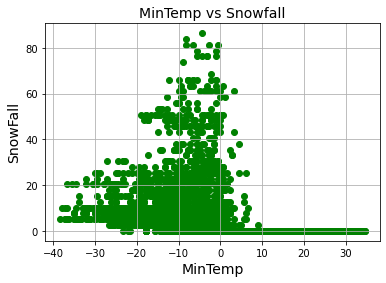

In [51]:
plt.scatter(df['MinTemp'], df['Snowfall'], color='green')
plt.title('MinTemp vs Snowfall', fontsize=14)
plt.xlabel('MinTemp', fontsize=14)
plt.ylabel('SnowFall', fontsize=14)
plt.grid(True)
plt.show()

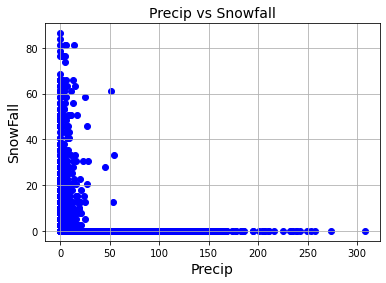

In [54]:
plt.scatter(df['Precip'], df['Snowfall'], color='blue')
plt.title('Precip vs Snowfall', fontsize=14)
plt.xlabel('Precip', fontsize=14)
plt.ylabel('SnowFall', fontsize=14)
plt.grid(True)
plt.show()

In [55]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [56]:
df.fillna(0, inplace=True)

In [57]:
X1 = df[['MeanTemp','MinTemp','Precip']] # here we have 3 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y1 = df['Snowfall']
 
# with sklearn


In [58]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X1, Y1)



LinearRegression()

In [59]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 2.6101852978188242
Coefficients: 
 [-0.1224047   0.02108795  0.00031415]


In [60]:
#comprehensive table with statistical info generated by statsmodels.
import statsmodels.api as sm
X1 = sm.add_constant(X1)

In [136]:
model = sm.OLS(Y1, X1).fit()
predictions = model.predict(X1) 
 
print_model = model.summary()
print(print_model) #coefficients captured in this table  match with the coefficients generated by sklearn.
#we got consistent results by applying both sklearn and statsmodels.

                            OLS Regression Results                            
Dep. Variable:               Snowfall   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     4659.
Date:                Fri, 13 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:39:30   Log-Likelihood:            -2.7666e+05
No. Observations:              119040   AIC:                         5.533e+05
Df Residuals:                  119036   BIC:                         5.534e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6102      0.025    105.969      0.0

In [62]:
#snowfall=(Intercept) + (Meantemp coef)*X1 + (Mintemp coef)*X2+ (Precip Coef)*x3

#snowfall=(2.6102)+ (-0.1224)x1 +  (0.0211)x2 + (0.0003)x3